# Projet 02 : Analysez des données de systèmes éducatifs


1. <font color=green> **Contexte & Problématique** :</font>
    1. La Start-up Academy, qui propose des contenus de **formation en ligne** pour un **public** de niveau **lycée** et **université**.
    1. Dans le cadre due leur projet d’expansion à l’international. la Star-up a besoin de nous pour réaliser une d’***analyse exploratoire des données***, pour déterminer **si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion**.
        <br>
        <br>
2.  <font color=green> **Les enjeux stratégiques pour le client** :</font>
    1. Le client a besoin d'avoir des réponses aux questions suivantes :
        1. [X] Quels sont les pays avec un fort potentiel de clients pour nos services ? </font>
        1. [X] Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?  
        1. [X] Dans quels pays l'entreprise doit-elle opérer en priorité ?
        <br>
        <br>
    1. La pré-analyse doit absolumenet permettre de :
        1. [X] Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
        1. [X] Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
        1. [X] Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
        1. [X] Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)
        <br>
        <br>
3.  <font color=green> **Data & inputs** :</font>
     1. l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... Pour plus d'info consulter le site :(http://datatopics.worldbank.org/education/)
     
     
4.  <font color=green> **Analyse et Livrables** :</font>
    1. Un notebook comportant les analyses pré-exploratoires réalisées (non cleané, pour comprendre votre démarche).
    1. Un support de présentation pour la soutenance.
    
    
5. <font color=green> **Démarche** :</font>

<img src="https://miro.medium.com/max/3870/1*eE8DP4biqtaIK3aIy1S2zA.png" 
     alt="Alt text that describes the graphic" 
     title="The OSEMN framework" />
#    

In [1]:
%matplotlib inline
#%config IPCompleter.greedy=True
%config Completer.use_jedi = False


import pandas as pd
import seaborn as sns
from glob import glob

sns.set(style="white")

## <div class="alert alert-block alert-info"> Phase 1 - Obtain Data 
- Télécharger les fichiers de données à partir du site: (https://datacatalog.worldbank.org)
- Charger les fichiers csv dans des dataFrames.
- Visualiser les dataframes (longueur, nbr colonnes, nbr lignes, type de données......)
- Essayer d'identifier les dataframes qui pourront contenir des réponses aux questions du client.
</div>

In [2]:
files_list = glob("Edstats_csv/*.csv")

In [3]:
data_frame_names = []
for k in files_list :
    data_frame = k.split("\\")[1].replace("-","_").split(".")[0]
    exec(f"{data_frame} = pd.read_csv('{k}')") # F-String vs dynamic strings
    data_frame_names.append(data_frame)
    print(data_frame)

EdStatsCountry_Series
EdStatsCountry
EdStatsData
EdStatsFootNote
EdStatsSeries


<b>Fichier n°1 sur 5:</b>  EdStatsCountry_Series.

In [4]:
print("le fichier EdStatsCountry_Series, contient : \n -",
      EdStatsCountry_Series.shape[0],
      "lignes \n -",
      EdStatsCountry_Series.shape[1],
      "colonnes")

le fichier EdStatsCountry_Series, contient : 
 - 613 lignes 
 - 4 colonnes


In [5]:
EdStatsCountry_Series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [6]:
print("le fichier EdStatsCountry_Series, contient : \n -",
      EdStatsCountry_Series.shape[0],
      "lignes \n -",
      EdStatsCountry_Series.shape[1],
      "colonnes")

le fichier EdStatsCountry_Series, contient : 
 - 613 lignes 
 - 4 colonnes


In [7]:
EdStatsCountry_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


<b>Fichier n°2 sur 5:</b> EdStatsCountry.

In [8]:
EdStatsCountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [9]:
print("le fichier EdStatsCountry, contient : \n -",
      EdStatsCountry.shape[0],
      "lignes \n -",
      EdStatsCountry.shape[1],
      "colonnes")

le fichier EdStatsCountry, contient : 
 - 241 lignes 
 - 32 colonnes


In [10]:
EdStatsCountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

<b>Fichier n°3 sur 5:</b> EdStatsData.

In [11]:
EdStatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print("le fichier EdStatsData, contient : \n -",
      EdStatsData.shape[0],
      "lignes \n -",
      EdStatsData.shape[1],
      "colonnes")

le fichier EdStatsData, contient : 
 - 886930 lignes 
 - 70 colonnes


In [13]:
EdStatsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [14]:
# compter le nbr d'indicateurs different dans la colonne Indicator Name
EdStatsData["Indicator Name"].nunique()

3665

In [15]:
# Afficher la liste des indicateurs 
EdStatsData["Indicator Name"].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

In [16]:
# Afficher la liste des indicateurs complète
print("\n".join(EdStatsData["Indicator Name"].unique().tolist()))

Adjusted net enrolment rate, lower secondary, both sexes (%)
Adjusted net enrolment rate, lower secondary, female (%)
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)
Adjusted net enrolment rate, lower secondary, male (%)
Adjusted net enrolment rate, primary, both sexes (%)
Adjusted net enrolment rate, primary, female (%)
Adjusted net enrolment rate, primary, gender parity index (GPI)
Adjusted net enrolment rate, primary, male (%)
Adjusted net enrolment rate, upper secondary, both sexes (%)
Adjusted net enrolment rate, upper secondary, female (%)
Adjusted net enrolment rate, upper secondary, gender parity index (GPI)
Adjusted net enrolment rate, upper secondary, male (%)
Adjusted net intake rate to Grade 1 of primary education, both sexes (%)
Adjusted net intake rate to Grade 1 of primary education, female (%)
Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)
Adjusted net intake rate to Grade 1 of primary education, male (%)
Adul

 Liste des Indicateurs qui pourront  potentiellement répondre aux attentes du client :
 

     - Barro-Lee: Population in thousands, age 15-19, total
     - Population of the official age for secondary education, both sexes (number)
     - Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary
     - Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary)


     - Barro-Lee: Population in thousands, age 20-24, total
     - Population of the official age for tertiary education, both sexes (number)
     - Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Completed Tertiary
     - Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)
     
     
    - Population, ages 15-24, total    
    - Population growth (annual %)
    - Population, total
    - Internet users (per 100 people)

 

    
 

 



<b>Fichier n°4 sur 5:</b> EdStatsFootNote.

In [17]:
EdStatsFootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [18]:
print("le fichier EdStatsFootNote, contient : \n -",
      EdStatsFootNote.shape[0],
      "lignes \n -",
      EdStatsFootNote.shape[1],
      "colonnes")

le fichier EdStatsFootNote, contient : 
 - 643638 lignes 
 - 5 colonnes


In [19]:
EdStatsFootNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [20]:
EdStatsFootNote["DESCRIPTION"].unique()

array(['Country estimation.', 'UIS Estimation',
       'UNESCO Institute for Statistics (UIS) estimate', ...,
       'Uncertainty bound is 91.6 - 109.3',
       'Uncertainty bound is 54.3 - 76',
       'Uncertainty bound is 48.3 - 73.3'], dtype=object)

<b>Fichier n°5 sur 5:</b> EdStatsSeries.

In [21]:
EdStatsSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
print("le fichier EdStatsSeries, contient : \n -",
      EdStatsSeries.shape[0],
      "lignes \n -",
      EdStatsSeries.shape[1],
      "colonnes")

le fichier EdStatsSeries, contient : 
 - 3665 lignes 
 - 21 colonnes


In [23]:
EdStatsSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

##  <div class="alert alert-block alert-warning"> Phase 1 - Summary 


1. Description des fichiers de données
    
| Nom du fichier| Nombre de lignes | Nombre de colonnes | Taille  | 
|:-             |:-               |:-                   |:-                  
| EdStatsCountry_Series| 613 | 4 | 19.3+ KB | 
|EdStatsCountry | 241| 32 | 60.4+ KB |
|EdStatsData|886930 |70|473.7+ MB|
|EdStatsSeries | 3665 | 21 | 601.4+ KB|
|EdStatsFootNote|643638 |5|24.6+ MB|  
    
    
    
2. Pour bien mener l'analyse, nous aurons besoin des 4 colonnes suivantes :

| Colonne | Fichier | Pourquoi? | 
|:-       |:-       |:-         |
| Region | EdStatsCountry | Mener l'analyse par zones géographiques.||
| Country Name | EdStatsData |Mener l'analyse par pays du monde.|
| Country Code | EdStatsData | Fusionner le fichier EdStatsCountry avec le fichier EdStatsData.|
| Indicator Name | EdStatsData | Cette colonne contient les KPI statistiques.| 
    
2. Voici la liste des KPI statistiques que nous allons exploiter dans le reste de l'analyse :
     - Barro-Lee: Population in thousands, age 15-19, total
     - Barro-Lee: Population in thousands, age 20-24, total
     - Population growth (annual %)

     - Population of the official age for tertiary education, both sexes (number)
     - Population of the official age for secondary education, both sexes (number)

     - Population, ages 15-24, total
     - Population, total

     - Internet users (per 100 people)

     - Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary.
     - Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Completed Tertiary.

     - Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary)
     - Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)
    
    
3. Dans la suite de l'analyse nous allons procéder à l'élimination des KPIs afin d'identifier et garder **UNIQUEMENT** ceux qui vont nous permettre de répondre aux attentes du client.

</div>

## <div class="alert alert-block alert-info"> Phase 2 - Scrub Data 

- Explorer les KPI identifiés dans la phase 1.
- Comparer les différents KPI et choisir les plus adaptés au besoin du client (pertinence du KPI, qualité de données dans le KPI…)
- Nettoyer les données (supprimer les values NaN, les doublons, les colonnes vides....).
    <br>
- Filtrer les données  (garder uniquement les infos en lien avec le besoin client)

</div>

In [24]:
# Filter le fichier EdStatsCountry et garder uniquement les colonnes Region et Country Code
region = pd.DataFrame({"Country Code":EdStatsCountry["Country Code"],"Region":EdStatsCountry["Region"]})

In [25]:
region.head()

,Country Code,Region
0,ABW,Latin America & Caribbean
1,AFG,South Asia
2,AGO,Sub-Saharan Africa
3,ALB,Europe & Central Asia
4,AND,Europe & Central Asia


In [26]:
EdStatsData_copy = EdStatsData.copy()

In [27]:
EdStatsData_copy.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
del EdStatsData_copy["Unnamed: 69"]

In [29]:
EdStatsData_copy.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Fusionner les dataframes EdStatsData et Region (qui contient la liste des régions)
EdStatsData_combined = pd.merge(region,EdStatsData_copy)

In [31]:
EdStatsData_combined.head(2)

,Country Code,Region,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,ABW,Latin America & Caribbean,Aruba,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Latin America & Caribbean,Aruba,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Filtrer la nouvelle dataframe et supprimer les colonnes jugées non utiles pour l'analyse
EdStatsData_combined = EdStatsData_combined.drop(["Country Code","Indicator Code"],axis=1)

In [33]:
EdStatsData_combined.head(2)

,Region,Country Name,Indicator Name,1970,1971,1972,1973,1974,1975,1976,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Latin America & Caribbean,Aruba,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Latin America & Caribbean,Aruba,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Phase 2.1 -  Identifier les KPIs les plus pertinents pour l'analyse 

### Phase 2.1.1 -  Lycée KPI

In [34]:
# Trouver les meilleurs KPI pour l'analyse sur la population lycée


# KPI1 = Barro-Lee: Population in thousands, age 15-19, total
# KPI2 = Population of the official age for secondary education, both sexes (number)
# KPI3 = Population, ages 15-24, total
# KPI4 = Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary.
# KPI5 = Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary)

Data_High_School_KPI1 = EdStatsData_combined[EdStatsData_combined["Indicator Name"] == "Barro-Lee: Population in thousands, age 15-19, total"]
Data_High_School_KPI2 = EdStatsData_combined[EdStatsData_combined["Indicator Name"] == "Population of the official age for secondary education, both sexes (number)"]
Data_High_School_KPI3 = EdStatsData_combined[EdStatsData_combined["Indicator Name"] == "Population, ages 15-24, total"]
Data_High_School_KPI4 = EdStatsData_combined[EdStatsData_combined["Indicator Name"] == "Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary"]
Data_High_School_KPI5 = EdStatsData_combined[EdStatsData_combined["Indicator Name"] == "Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary)"]


In [35]:
# Compter le nbr de values NaN pour chaque KPI par an
KPI1_Null_Values = Data_High_School_KPI1.count() 
KPI2_Null_Values = Data_High_School_KPI2.count()
KPI3_Null_Values = Data_High_School_KPI3.count()
KPI4_Null_Values = Data_High_School_KPI4.count()
KPI5_Null_Values = Data_High_School_KPI5.count()


In [36]:
not_Null_Comparatif_High_School = pd.DataFrame(
    {
        "KPI1":KPI1_Null_Values,
        "KPI2":KPI2_Null_Values,
        "KPI3":KPI3_Null_Values,
        "KPI4":KPI4_Null_Values,
        "KPI5":KPI5_Null_Values,
    }
        )

In [37]:
# Affichr toutes les lignes de la dataframe et comparer les KPI ()
pd.set_option('display.max_rows', len(not_Null_Comparatif_High_School)) 
not_Null_Comparatif_High_School


,KPI1,KPI2,KPI3,KPI4,KPI5
Region,214,214,214,214,214
Country Name,241,241,241,241,241
Indicator Name,241,241,241,241,241
1970,144,214,0,144,144
1971,0,213,0,0,0
1972,0,213,0,0,0
1973,0,213,0,0,0
1974,0,213,0,0,0
1975,144,213,0,144,144
1976,0,213,0,0,0


- Le KPI2 est celui qui contient le moins de valuers : None, NaN, NaT :
  -  Il contient des données de 1970 jusqu'à 2015 ==> ***45 ans de données***.
  
- Le KPI2 = Population of the official age for secondary education, both sexes (number).

- **Pour le reste de l'analyse, nous allons utiliser ce KPI pour évaluer le potentiel de client pour les formations destinées aux lyciens.**

- Sachant que les données proviennent de la même source, il est possible qu'on utilise le même KPI pour l'université.
Toutefois, nous allons le confirmer en suivant la même démarche.

In [38]:
# Créer une nouvelle dataframe avec un filtre sur le KPI Population of the official age for secondary education, both sexes (number)
Data_High_School = EdStatsData_combined[EdStatsData_combined["Indicator Name"] == "Population of the official age for secondary education, both sexes (number)"]
Data_High_School = Data_High_School.reset_index().drop(["index"],axis=1)
Data_High_School = Data_High_School.drop(["Indicator Name"],axis=1)
Data_High_School = Data_High_School.set_index(["Region","Country Name"])
Data_High_School = Data_High_School[["2013","2014","2015"]]
Data_High_School.head()

2013       2014       2015
Region                    Country Name                                 
Latin America & Caribbean Aruba            7493.0     7457.0     7408.0
South Asia                Afghanistan   4477827.0  4676453.0  4850112.0
Sub-Saharan Africa        Angola        3301915.0  3430540.0  3562398.0
Europe & Central Asia     Albania        361431.0   345644.0   329011.0
                          Andorra             NaN        NaN        NaN

### Phase 2.1.2 -  Université KPI

In [39]:
# Trouver les meilleurs KPI pour l'analyse sur la population université

# KPI6 = Barro-Lee: Population in thousands, age 20-24, total
# KPI7 = Population of the official age for tertiary education, both sexes (number)
# KPI8 = Population, ages 15-24, total
# KPI9 = Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Completed Tertiary.
# KPI10 = Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)

Data_University_KPI6 = EdStatsData_combined[EdStatsData_combined["Indicator Name"] == "Barro-Lee: Population in thousands, age 20-24, tota"]
Data_University_KPI7 = EdStatsData_combined[EdStatsData_combined["Indicator Name"] == "Population of the official age for tertiary education, both sexes (number)"]
Data_University_KPI8 = EdStatsData_combined[EdStatsData_combined["Indicator Name"] == "Population, ages 15-24, total"]
Data_University_KPI9 = EdStatsData_combined[EdStatsData_combined["Indicator Name"] == "Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Completed Tertiary"]
Data_University_KPI10 = EdStatsData_combined[EdStatsData_combined["Indicator Name"] == "Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)"]


In [40]:
# Compter le nbr de Non-null valuespour chaque KPI par an
KPI6_Null_Values = Data_University_KPI6.count() 
KPI7_Null_Values = Data_University_KPI7.count()
KPI8_Null_Values = Data_University_KPI8.count()
KPI9_Null_Values = Data_University_KPI9.count()
KPI10_Null_Values = Data_University_KPI10.count()

In [41]:
non_Null_Comparatif_Unversity = pd.DataFrame(
    {
        "KPI6":KPI6_Null_Values,
        "KPI7":KPI7_Null_Values,
        "KPI8":KPI8_Null_Values,
        "KPI9":KPI9_Null_Values,
        "KPI10":KPI10_Null_Values,
    }
        )

In [42]:
pd.set_option('display.max_rows', len(not_Null_Comparatif_High_School)) 
non_Null_Comparatif_Unversity

,KPI6,KPI7,KPI8,KPI9,KPI10
Region,0,214,214,214,214
Country Name,0,241,241,241,241
Indicator Name,0,241,241,241,241
1970,0,215,0,144,144
1971,0,213,0,0,0
1972,0,213,0,0,0
1973,0,213,0,0,0
1974,0,213,0,0,0
1975,0,213,0,144,144
1976,0,213,0,0,0


- Le KPI7 est celui qui contient le moins de valeurs : None, NaN, NaT :
  - Il contient des données de 1970 jusqu'à 2015 ==> ***45 ans de données***.
  - Il s'agit du même KPI choisi pour le lycée.
  
- Le KPI7 = Population of the official age for tertiary education, both sexes (number).

- **Pour le reste de l'analyse, nous allons fusionner les 2 KPI** afin d'avoir **une seule population à analyser** (population lycée + population université) .


In [43]:
pd.reset_option('display.max_rows') # reste dataframe rows number to be showen to default

In [44]:
# Créer une nouvelle dataframe avec un filtre sur le KPI Population of the official age for tertiary education, both sexes (number)
Data_University = EdStatsData_combined[EdStatsData_combined["Indicator Name"] == "Population of the official age for tertiary education, both sexes (number)"]
Data_University = Data_University.reset_index().drop(["index"],axis=1)
Data_University = Data_University.drop(["Indicator Name"],axis=1)
Data_University = Data_University.set_index(["Region","Country Name"])
Data_University = Data_University [["2013","2014","2015"]]
Data_University.head()

2013       2014       2015
Region                    Country Name                                 
Latin America & Caribbean Aruba            7292.0     7528.0     7634.0
South Asia                Afghanistan   2873526.0  3034517.0  3199607.0
Sub-Saharan Africa        Angola        2203633.0  2286479.0  2374694.0
Europe & Central Asia     Albania        276635.0   277193.0   276247.0
                          Andorra             NaN        NaN        NaN

In [45]:
# Créer une nouvelle dataFrame avec la somme des 2 KPIs et convertie en Millions :  
# Population of the official age for secondary education, both sexes (number)
# Population of the official age for tertiary education, both sexes (number)
# Définir la  Region & Country Name comme Indice
client_potential = Data_High_School.add(Data_University,fill_value=0).div(1000000)
client_potential = client_potential.reset_index()
client_potential = client_potential.dropna(axis=1,how="all")
client_potential = client_potential.dropna(axis=0,how="any")
client_potential = client_potential.set_index(["Region","Country Name"])

In [46]:
client_potential.head(2)

,,2013,2014,2015
Region,Country Name,,,
Latin America & Caribbean,Aruba,0.014785,0.014985,0.015042
South Asia,Afghanistan,7.351353,7.710970,8.049719


In [47]:
# filtre 1, supprimer les colonnes qui ne contiennent aucune valeur
# filtre 2, supprimer les lignes qui contiennent au moins une valeur manquante.
# filtre 3, pour l'analyse nous allons utiliser uniquement les données sur les 4 dernières années (de 2013 à 2016)


In [48]:
client_potential.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 193 entries, ('Latin America & Caribbean', 'Aruba') to ('Sub-Saharan Africa', 'Zimbabwe')
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2013    193 non-null    float64
 1   2014    193 non-null    float64
 2   2015    193 non-null    float64
dtypes: float64(3)
memory usage: 11.1+ KB


### Phase 2.1.3 -  Évolution de potentiel des clients - KPI (Population growth annual %)


In [49]:
population_Growth = EdStatsData_combined[EdStatsData_combined["Indicator Name"] == "Population growth (annual %)"].reset_index()
population_Growth = population_Growth.drop(["index"],axis=1)
population_Growth = population_Growth.set_index(["Region","Country Name"])
population_Growth.head(2)

,,Indicator Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Region,Country Name,,,,,,,,,,,,,,,,,,,,,
Latin America & Caribbean,Aruba,Population growth (annual %),0.572211,0.636273,0.670693,0.671205,0.471968,0.212898,-0.117120,-0.363781,-0.436628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Asia,Afghanistan,Population growth (annual %),2.472266,2.587996,2.628657,2.576017,2.412657,2.157653,1.966302,1.754255,1.294025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
population_Growth.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 241 entries, ('Latin America & Caribbean', 'Aruba') to ('Sub-Saharan Africa', 'Zimbabwe')
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  241 non-null    object 
 1   1970            236 non-null    float64
 2   1971            236 non-null    float64
 3   1972            236 non-null    float64
 4   1973            236 non-null    float64
 5   1974            236 non-null    float64
 6   1975            236 non-null    float64
 7   1976            236 non-null    float64
 8   1977            236 non-null    float64
 9   1978            236 non-null    float64
 10  1979            236 non-null    float64
 11  1980            236 non-null    float64
 12  1981            236 non-null    float64
 13  1982            236 non-null    float64
 14  1983            236 non-null    float64
 15  1984            236 non-null    float64
 16  1985        

In [51]:
# Filtration des données
# filtre 1, utiliser garder uniquement les données sur les années de 2013 à 2016
# filtre 2, supprimer les colonnes qui ne contiennent aucune value
# filtre 3, supprimer les lignes qui contiennent au moins 1 valeur manquante
population_Growth = population_Growth[["2013","2014","2015"]]
population_Growth = population_Growth.dropna(axis=1,how="all")
population_Growth = population_Growth.dropna(axis=0,how="any")

In [52]:
population_Growth.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 232 entries, ('Latin America & Caribbean', 'Aruba') to ('Sub-Saharan Africa', 'Zimbabwe')
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2013    232 non-null    float64
 1   2014    232 non-null    float64
 2   2015    232 non-null    float64
dtypes: float64(3)
memory usage: 16.6+ KB


### Phase 2.1.4 -  Évaluer  le part de la population avec accès à internet - KPI.
  - Nous aurons besoin de 2 indicateurs dans cette section :
  - Le % de la population qui a accès à internet par pays et par région.
  - Le nombre total de la population par pays et par région.
  - la multiplication des 2 indicateurs, nous permettra d'estimer la part de la population qui a accès à internet par pays et par région

In [53]:
# filtrer le % de la population qui a accès à internet
pourcentage_population_With_Internet = EdStatsData_combined[EdStatsData_combined["Indicator Name"] == "Internet users (per 100 people)"].reset_index()
pourcentage_population_With_Internet = pourcentage_population_With_Internet.drop(["index"],axis=1)
pourcentage_population_With_Internet = pourcentage_population_With_Internet.set_index(["Region","Country Name"])
pourcentage_population_With_Internet.head(2)

,,Indicator Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Region,Country Name,,,,,,,,,,,,,,,,,,,,,
Latin America & Caribbean,Aruba,Internet users (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Asia,Afghanistan,Internet users (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
pourcentage_population_With_Internet.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 241 entries, ('Latin America & Caribbean', 'Aruba') to ('Sub-Saharan Africa', 'Zimbabwe')
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  241 non-null    object 
 1   1970            7 non-null      float64
 2   1971            0 non-null      float64
 3   1972            0 non-null      float64
 4   1973            0 non-null      float64
 5   1974            0 non-null      float64
 6   1975            7 non-null      float64
 7   1976            7 non-null      float64
 8   1977            7 non-null      float64
 9   1978            7 non-null      float64
 10  1979            7 non-null      float64
 11  1980            7 non-null      float64
 12  1981            7 non-null      float64
 13  1982            7 non-null      float64
 14  1983            7 non-null      float64
 15  1984            7 non-null      float64
 16  1985        

In [55]:
# filtre 1, garder uniquement les données sur les années de 2013 à 2016
# filtre 2, supprimer les colonnes qui ne contiennent aucune value
# filtre 3, supprimer les lignes qui contiennent au moins 1 valeur manquante
# filtre 4, convertir l'indicateur en % en divisant par 100
pourcentage_population_With_Internet = pourcentage_population_With_Internet[["2013","2014","2015"]]
pourcentage_population_With_Internet = pourcentage_population_With_Internet.dropna(axis=1,how="all")
pourcentage_population_With_Internet = pourcentage_population_With_Internet.div(100)

In [56]:
pourcentage_population_With_Internet.groupby("Region").mean().head()

,2013,2014,2015
Region,,,
East Asia & Pacific,0.406286,0.438041,0.473270
Europe & Central Asia,0.678065,0.701868,0.724880
Latin America & Caribbean,0.458267,0.493705,0.530970
Middle East & North Africa,0.488773,0.526242,0.554471
North America,0.841667,0.856400,0.871159


In [57]:
# filtrer le nombre total de la population et le convertir en Millions
population = EdStatsData_combined[EdStatsData_combined["Indicator Name"] == "Population, total"]
population = population.dropna(axis=1,how="all")
population = population.dropna(axis=0,how="any")
population = population.set_index(["Region","Country Name"])
population = population[["2013","2014","2015"]]
population = population.div(1000000)

In [58]:
population.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 206 entries, ('Latin America & Caribbean', 'Aruba') to ('Sub-Saharan Africa', 'Zimbabwe')
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2013    206 non-null    float64
 1   2014    206 non-null    float64
 2   2015    206 non-null    float64
dtypes: float64(3)
memory usage: 15.6+ KB


In [59]:
# Calculer le nombre de personnes qui ont accès à Internet par pays et par région 
# en multipliant le % de la population qui a accès à Internet par le nombre total de la population
population_With_Internet = population.mul(pourcentage_population_With_Internet, axis=1)
population_With_Internet = population_With_Internet.dropna(axis=1,how="all")
population_With_Internet = population_With_Internet.dropna(axis=0,how="any")

C:\Users\Mohamed-Sidina\Desktop\Training Folder\0_Projects\Project02\lib\site-packages\pandas\core\indexes\multi.py:3587: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  uniq_tuples = lib.fast_unique_multiple([self._values, other._values], sort=sort)


In [60]:
population_With_Internet.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 197 entries, ('East Asia & Pacific', 'Australia') to ('Sub-Saharan Africa', 'Zimbabwe')
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2013    197 non-null    float64
 1   2014    197 non-null    float64
 2   2015    197 non-null    float64
dtypes: float64(3)
memory usage: 15.6+ KB


In [61]:
population.groupby("Region").sum().head()

,2013,2014,2015
Region,,,
East Asia & Pacific,2227.197378,2242.494204,2257.728885
Europe & Central Asia,891.657150,895.930054,900.295225
Latin America & Caribbean,617.241602,624.077118,630.799854
Middle East & North Africa,405.182516,412.945709,420.603787
North America,351.425360,354.173159,356.810463


In [62]:
population_With_Internet.groupby("Region").sum().head()

,2013,2014,2015
Region,,,
East Asia & Pacific,974.329116,1030.777851,1105.066345
Europe & Central Asia,590.591329,615.988210,639.004277
Latin America & Caribbean,285.523476,304.381102,342.480451
Middle East & North Africa,141.285871,164.202170,184.891672
North America,255.995627,263.580802,271.021321


##  <div class="alert alert-block alert-warning"> Phase 2 - Summary 

1. Voici les Indicateurs que nous avons retenu pour l'analyse :

| Indicateur |Définition | Pourquoi? | Unité| Comment obetenir cette information|
|:- |:- |:- |:- |:- |
| Population of the potential customers  | La population agée de 15 ans à 24 ans | Identifier le potentiel de clients pour suivre des formations | Millions | La somme des 2 KPIs suivant <strong> <br>Population of the official age for both secondary education, both sexes (number)</strong> et <strong><br>Population of the official age for tertiary education, both sexes (number)</strong>
| Population with Internet | Le nombre de la population qui accès à internet | Sachant que notre client propose des formations en ligne, avoir accès à internet est a MUST | Millions | La multiplication des 2 KPI suivant, <strong><br>Internet users (per 100 people)</strong> et <strong><br> Population, total </strong>
| Population growth (annual %) | Le % de croissance de la population annuel| Éviter à notre client de choisir un marché avec une clientèle en décroit| % | à partir du jeu de données.

    
    
2. Rappel de la conclusion de la Phase 1, les colonnes à utiliser pour mener l'analyse :
| Colonne | Fichier | Pourquoi? | 
|:-       |:-       |:-         |
| Region | EdStatsCountry | Mener l'analyse par zones géographiques.||
| Country Name | EdStatsData |Mener l'analyse par pays du monde.|
| Country Code | EdStatsData | Fusionner le fichier EdStatsCountry avec le fichier EdStatsData.|
| Indicator Name | EdStatsData | Cette colonne contient les KPI statistiques.| 
    

    
3. Sachant que nous ne savons pas pour quelle année on nous demande de réaliser l'analyse. J'ai décidé de garder UNIQUEMENT les 3 dernières années (2013, 2014 et 2015) pour réaliser l'analyse.

   

</div>

## <div class="alert alert-block alert-info"> Phase 3 - Explore Data 
- Déterminer les (moyenne/médiane/écart-type) pour chaque indicateur par Région et par Pays. 
- Trouver les réponses aux questions stratégiques du client : 
    - Quels sont les pays avec un fort potentiel de clients pour nos services ? 
    - Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
    - Dans quels pays l'entreprise doit-elle opérer en priorité ?
</div>

### Phase 3.1 -  (moyenne/médiane/écart-type) Population of the potential customers :

In [63]:
# Apply describe function on rows instead of columns

In [64]:
client_potential.head()

,,2013,2014,2015
Region,Country Name,,,
Latin America & Caribbean,Aruba,0.014785,0.014985,0.015042
South Asia,Afghanistan,7.351353,7.710970,8.049719
Sub-Saharan Africa,Angola,5.505548,5.717019,5.937092
Europe & Central Asia,Albania,0.638066,0.622837,0.605258
Middle East & North Africa,United Arab Emirates,0.551272,0.541794,0.525697


#### Phase 3.1.1 -  (moyenne/médiane/écart-type) Population of the potential customers  par Région:

In [65]:
client_potential_by_region = client_potential.groupby("Region").sum().apply(pd.DataFrame.describe, axis=1).sort_values(by=["mean"],ascending = False)

In [66]:
client_potential_by_region

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
South Asia,3.0,391.530120,6.984365,383.600488,388.910911,394.221334,395.494935,396.768537
East Asia & Pacific,3.0,343.525065,20.795243,319.938739,335.678736,351.418733,355.318228,359.217723
Sub-Saharan Africa,3.0,195.952862,30.178238,163.162661,182.648256,202.133851,212.347962,222.562074
Latin America & Caribbean,3.0,122.119862,0.230261,121.947273,121.989137,122.031001,122.206157,122.381313
Europe & Central Asia,3.0,121.815859,7.431586,113.283667,119.286026,125.288386,126.081955,126.875523
Middle East & North Africa,3.0,78.677829,2.230199,76.682672,77.474005,78.265338,79.675408,81.085478
North America,3.0,51.533482,1.525117,49.772697,51.079954,52.387210,52.413874,52.440538


In [67]:
client_potential_by_region = client_potential_by_region.rename(columns={"mean":"average_potential_customer_by_region"})
client_potential_by_region = client_potential_by_region[["average_potential_customer_by_region"]]

#### Phase 3.1.2 -  (moyenne/médiane/écart-type) Population of the potential customers  par Pays:

In [68]:
client_potential_by_country = client_potential.groupby("Country Name").sum().apply(pd.DataFrame.describe, axis=1).sort_values(by=["mean"],ascending = False)

In [69]:
client_potential_by_country

,count,mean,std,min,25%,50%,75%,max
Country Name,,,,,,,,
India,3.0,292.929635,1.680540,291.238824,292.094596,292.950368,293.775040,294.599712
China,3.0,200.921981,9.886845,191.277776,195.865572,200.453368,205.744084,211.034800
Indonesia,3.0,48.165372,0.570725,47.592634,47.881027,48.169420,48.451741,48.734062
United States,3.0,47.518709,0.119794,47.382430,47.474371,47.566312,47.586848,47.607384
Pakistan,3.0,45.771208,0.202790,45.572954,45.667688,45.762422,45.870335,45.978248
...,...,...,...,...,...,...,...,...
St. Kitts and Nevis,3.0,0.009095,0.000088,0.009011,0.009049,0.009087,0.009136,0.009186
Marshall Islands,3.0,0.008672,0.002156,0.006209,0.007899,0.009589,0.009903,0.010217
Liechtenstein,3.0,0.004405,0.001260,0.002950,0.004035,0.005120,0.005132,0.005145


In [70]:
client_potential_by_country = client_potential_by_country.rename(columns={"mean":"average_potential_customer_by_country"})
client_potential_by_country = client_potential_by_country[["average_potential_customer_by_country"]]


### Phase 3.2 -  (moyenne/médiane/écart-type) Nombre de personnes avec un accès à Internet

In [71]:
population_With_Internet.head(2)

2013       2014       2015
Region              Country Name                                      
East Asia & Pacific Australia          19.292240  19.706983  20.116388
                    Brunei Darussalam   0.261687   0.283129   0.297290

#### Phase 3.2.1 -  (moyenne/médiane/écart-type) Nombre de personnes avec un accès à Internet par Région:

In [72]:
internet_by_region = population_With_Internet.groupby("Region").sum().head().apply(pd.DataFrame.describe, axis=1).sort_values("mean", ascending=False)

In [73]:
internet_by_region

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,3.0,1036.724437,65.571161,974.329116,1002.553483,1030.777851,1067.922098,1105.066345
Europe & Central Asia,3.0,615.194605,24.216229,590.591329,603.289770,615.988210,627.496243,639.004277
Latin America & Caribbean,3.0,310.795010,29.015133,285.523476,294.952289,304.381102,323.430777,342.480451
North America,3.0,263.532583,7.512963,255.995627,259.788214,263.580802,267.301061,271.021321
Middle East & North Africa,3.0,163.459904,21.812375,141.285871,152.744020,164.202170,174.546921,184.891672


In [74]:
internet_by_region = internet_by_region.rename(columns={"mean":"average_internet_user_by_region"})
internet_by_region = internet_by_region[["average_internet_user_by_region"]]

#### Phase 3.2.2 -  (moyenne/médiane/écart-type) Nombre de personnes avec un accès à Internet par Pays:

In [75]:
internet_by_country = population_With_Internet.groupby("Country Name").sum().apply(pd.DataFrame.describe, axis=1).sort_values("mean", ascending=False)

In [76]:
internet_by_country

,count,mean,std,min,25%,50%,75%,max
Country Name,,,,,,,,
China,3.0,654.963010,34.045869,621.680040,637.582685,653.485330,671.604495,689.723660
India,3.0,268.375793,73.702171,193.062893,232.386672,271.710452,306.032243,340.354035
United States,3.0,232.521180,6.735856,225.770304,229.160814,232.551323,235.896619,239.241914
Japan,3.0,113.871651,1.717272,112.431251,112.921432,113.411613,114.591850,115.772088
Brazil,3.0,111.614385,8.414099,103.309366,107.354838,111.400310,115.766894,120.133479
...,...,...,...,...,...,...,...,...
Monaco,3.0,0.035146,0.000667,0.034440,0.034837,0.035234,0.035499,0.035765
"Micronesia, Fed. Sts.",3.0,0.030856,0.002034,0.028829,0.029835,0.030840,0.031869,0.032898
Kiribati,3.0,0.013541,0.001064,0.012482,0.013006,0.013531,0.014071,0.014610


In [77]:
internet_by_country = internet_by_country.rename(columns={"mean":"average_internet_user_by_country"})
internet_by_country = internet_by_country[["average_internet_user_by_country"]]


### Phase 3.3 -  (moyenne/médiane/écart-type) Croissance annuelle de  la population

In [78]:
population_Growth.head(2)

,,2013,2014,2015
Region,Country Name,,,
Latin America & Caribbean,Aruba,0.592914,0.587492,0.524658
South Asia,Afghanistan,3.315224,3.183201,2.943234


In [79]:
population_Growth.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 232 entries, ('Latin America & Caribbean', 'Aruba') to ('Sub-Saharan Africa', 'Zimbabwe')
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2013    232 non-null    float64
 1   2014    232 non-null    float64
 2   2015    232 non-null    float64
dtypes: float64(3)
memory usage: 16.6+ KB


#### Phase 3.3.1 -  (moyenne/médiane/écart-type) Croissance annuelle de la population par Region:


In [80]:
growth_by_region = population_Growth.groupby("Region").mean().apply(pd.DataFrame.describe, axis=1).sort_values(by="mean",ascending=False)

In [81]:
growth_by_region

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,3.0,2.546476,0.011509,2.539720,2.539831,2.539942,2.549854,2.559765
Middle East & North Africa,3.0,2.440756,0.181101,2.266557,2.347111,2.427665,2.527856,2.628048
South Asia,3.0,1.644405,0.041592,1.599231,1.626052,1.652873,1.666992,1.681112
East Asia & Pacific,3.0,1.116969,0.017134,1.097480,1.110619,1.123758,1.126713,1.129668
Latin America & Caribbean,3.0,0.924423,0.033746,0.892159,0.906897,0.921635,0.940556,0.959477
North America,3.0,0.661893,0.076607,0.576288,0.630841,0.685395,0.704695,0.723995
Europe & Central Asia,3.0,0.337383,0.016808,0.325366,0.327780,0.330193,0.343392,0.356590


In [82]:
growth_by_region = growth_by_region.rename(columns={"mean":"average_growth_by_region"})
growth_by_region = growth_by_region[["average_growth_by_region"]]

#### Phase 3.3.2 -  (moyenne/médiane/écart-type) Croissance annuelle de la population par Pays:


In [83]:
growth_by_country = population_Growth.groupby("Country Name").mean().apply(pd.DataFrame.describe, axis=1).sort_values(by="mean",ascending=False)

In [84]:
growth_by_country

,count,mean,std,min,25%,50%,75%,max
Country Name,,,,,,,,
Oman,3.0,6.414313,0.518903,5.856170,6.180415,6.504660,6.693385,6.882110
Lebanon,3.0,5.803903,1.375754,4.334249,5.175344,6.016439,6.538730,7.061020
Qatar,3.0,5.413192,1.027539,4.412616,4.886926,5.361236,5.913479,6.465723
Kuwait,3.0,4.921504,0.915696,3.974069,4.481375,4.988681,5.395221,5.801762
Jordan,3.0,4.541908,0.619837,3.896131,4.246835,4.597538,4.864796,5.132054
...,...,...,...,...,...,...,...,...
Georgia,3.0,-0.953822,0.595746,-1.306163,-1.297742,-1.289322,-0.777652,-0.265983
Bosnia and Herzegovina,3.0,-1.041626,0.177162,-1.191240,-1.139441,-1.087641,-0.966819,-0.845996
Puerto Rico,3.0,-1.513245,0.324433,-1.760677,-1.696902,-1.633128,-1.389530,-1.145931


In [85]:
growth_by_country = growth_by_country.rename(columns={"mean":"average_growth_by_country"})
growth_by_country = growth_by_country[["average_growth_by_country"]]


### Phase 3.4 -  Chercher les réponses aux questions du client

##<font color=red> Merege all countries data
</font>

In [86]:
country_All_Data_Merged  = pd.concat(
    [client_potential_by_country,
    internet_by_country,
    growth_by_country],
     axis=1,
).reset_index().rename(columns={"index":"Country Name"})

In [87]:
country_All_Data_Merged.sort_values(by="average_internet_user_by_country",ascending=False)

,Country Name,average_potential_customer_by_country,average_internet_user_by_country,average_growth_by_country
1,China,200.921981,654.963010,0.502719
0,India,292.929635,268.375793,1.192091
3,United States,47.518709,232.521180,0.724373
18,Japan,11.190594,113.871651,-0.127697
5,Brazil,40.253257,111.614385,0.885795
...,...,...,...,...
230,Channel Islands,NaN,NaN,0.492141
231,Europe & Central Asia,NaN,NaN,0.473100
232,Euro area,NaN,NaN,0.331267
233,American Samoa,NaN,NaN,0.184773


In [88]:
country_All_Data_Merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country Name                           235 non-null    object 
 1   average_potential_customer_by_country  193 non-null    float64
 2   average_internet_user_by_country       197 non-null    float64
 3   average_growth_by_country              232 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.5+ KB


In [89]:
country_All_Data_Merged = country_All_Data_Merged.dropna(axis=1,how="all")
# country_All_Data_Merged = country_All_Data_Merged.dropna(axis=0,how="any")

In [90]:
country_All_Data_Merged2 = country_All_Data_Merged.copy()

In [110]:
country_All_Data_Merged2 = country_All_Data_Merged2.sort_values(["average_potential_customer_by_country"],ascending=False).head(10)

In [111]:
country_All_Data_Merged2

,Country Name,average_potential_customer_by_country,average_internet_user_by_country,average_growth_by_country
0,India,292.929635,268.375793,1.192091
1,China,200.921981,654.963010,0.502719
3,United States,47.518709,232.521180,0.724373
5,Brazil,40.253257,111.614385,0.885795
8,Mexico,25.757374,60.232195,1.368182
10,Russian Federation,17.978995,101.581596,0.207727
17,Germany,11.478268,69.742454,0.518493
18,Japan,11.190594,113.871651,-0.127697
25,United Kingdom,7.916506,58.908764,0.739284
26,France,7.869986,55.348611,0.485973



#### Phase 3.4.1 -  <font color=blue>Quels sont les pays avec un fort potentiel de clients pour nos services ?</font>

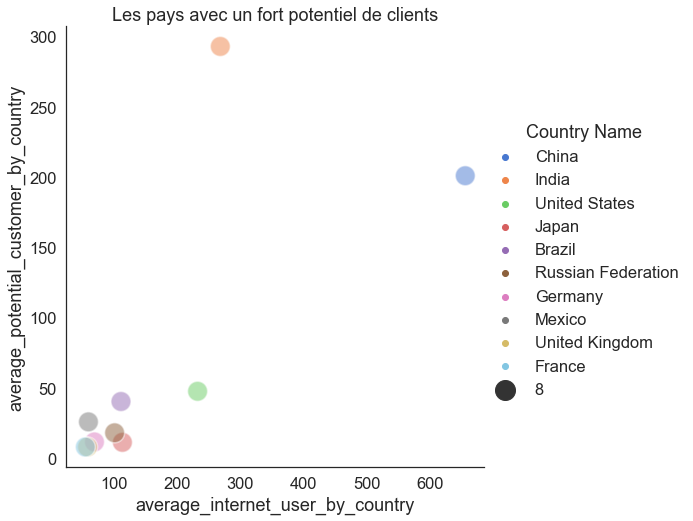

In [93]:
sns.set(style="white",font_scale=1.5)

sns.relplot(
            data=country_All_Data_Merged2,
            x="average_internet_user_by_country",
            y="average_potential_customer_by_country",
            size=8,
            #size="average_growth_by_country",
            hue="Country Name",
            sizes=(400,400),
            alpha=.5,
            palette="muted",
            height=7,    
).set(title="Les pays avec un fort potentiel de clients")

#### Phase 3.4.1 -  Quels sont les pays avec un fort potentiel de clients pour nos services ?
 - Qu'est un client potentiel ? Un client qui l'age d'un lycien ou d'un universitaire **ET** qui a un accès à internet.
 - D'après cette définition, voici le Top 3 des pays avec un fort potentiel de clients :
 
 |Rank | Pays | Potentiel de clients|
 |:-   |:-    |:- |
 |Top1 | India|292 Millions
 |Top2 | China|200 Millions
 |Top3 | USA| 47 Millions

#### Phase 3.4.2 -  <font color=blue>Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?</font>

In [94]:
country_All_Data_Merged2[country_All_Data_Merged2["Country Name"].isin(["China","India","United States"])]

,Country Name,average_potential_customer_by_country,average_internet_user_by_country,average_growth_by_country
1,China,200.921981,654.963010,0.502719
0,India,292.929635,268.375793,1.192091
3,United States,47.518709,232.521180,0.724373


#### Phase 3.4.3 -  <font color=blue>Dans quels pays l'entreprise doit-elle opérer en priorité ?</font> 

- L'entreprise doit opérer en priorité en **Inde** :
    - Ce pays contient la **moyenne** de clientèle** potentielle la plus élevée**.
    - **La deuxième population** la plus importante avec **accès à internet**.
    - **La croissance de population** la **plus élevée** parmi le Top 3 des pays.
 
| Country Name| average_potential_customer_by_country |average_internet_user_by_country |average_growth_by_country
|:-    |:- |:- |:- |
|China |200 Millions|654 Millions| 0.5 %
|India |292 Millions |268 Millions| 1,1 %
|USA   |47 Millions  |232 Millions| 0.7 %

##  <div class="alert alert-block alert-warning"> Phase  - Summary 
    

- <font color=blue>Quels sont les pays avec un fort potentiel de clients pour nos services ?</font>
|Rank | Pays | Potentiel de clients|
|:-   |:-    |:- |
|Top1 |India|292 Millions
|Top2 |China|200 Millions
|Top3 |USA| 47 Millions

- <font color=blue>Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?</font>
|Rank | Pays | Évolution en % du potentiel de clients|
|:-   |:-    |:- |
|Top1 |India|1.1%
|Top2 |China|0.5%
|Top3 |USA|0.7%   

- <font color=blue>Dans quels pays l'entreprise doit-elle opérer en priorité ?</font>
     - Nous recommandons  à l'entreprise d'opérer en priorité en **Inde**
        - Car, ce pays contient la **moyenne** de clientèle** potentielle la plus élevée**.
        - **La deuxième population** la plus importante avec **accès à internet**.
        - **La croissance de population** la **plus élevée** parmi le Top 3 des pays.
 
| Country Name| average_potential_customer_by_country |average_internet_user_by_country |average_growth_by_country
|:-    |:- |:- |:- |
|India |292 Millions |268 Millions| 1,1 %
|China |200 Millions|654 Millions| 0.5 %
|USA   |47 Millions  |232 Millions| 0.7 %

</div>